In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


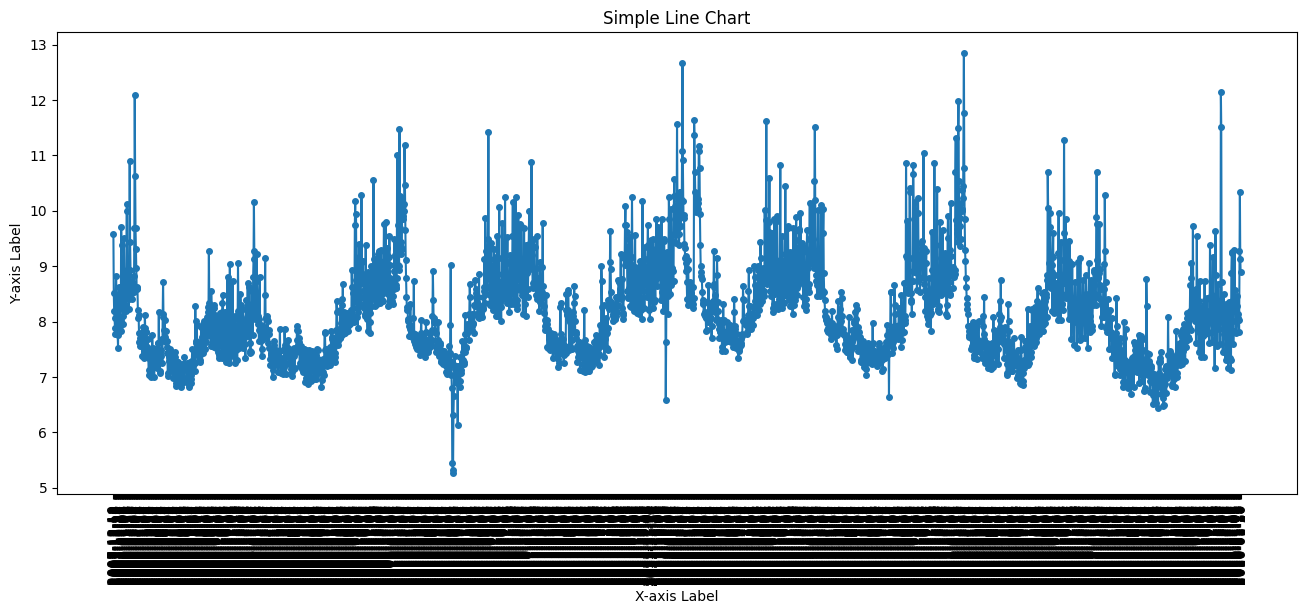

In [10]:
# Create the line chart
plt.figure(figsize=(16, 6)) 
plt.plot(df['ds'], df['y'], marker='o', linestyle='-', markersize=4, label='Time Series Value')
plt.xticks(rotation=90) 

# Add labels and a title for clarity
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Simple Line Chart")

# Display the chart
plt.show()

In [11]:
# fit a prophet model
m = Prophet()
m.fit(df)

11:24:20 - cmdstanpy - INFO - Chain [1] start processing
11:24:24 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# make future dataset
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [13]:
# look at the forecasted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.490869,8.909667
3266,2017-01-16,8.531958,7.785624,9.228468
3267,2017-01-17,8.319376,7.588117,9.011545
3268,2017-01-18,8.151991,7.412075,8.842417
3269,2017-01-19,8.163908,7.427516,8.878920


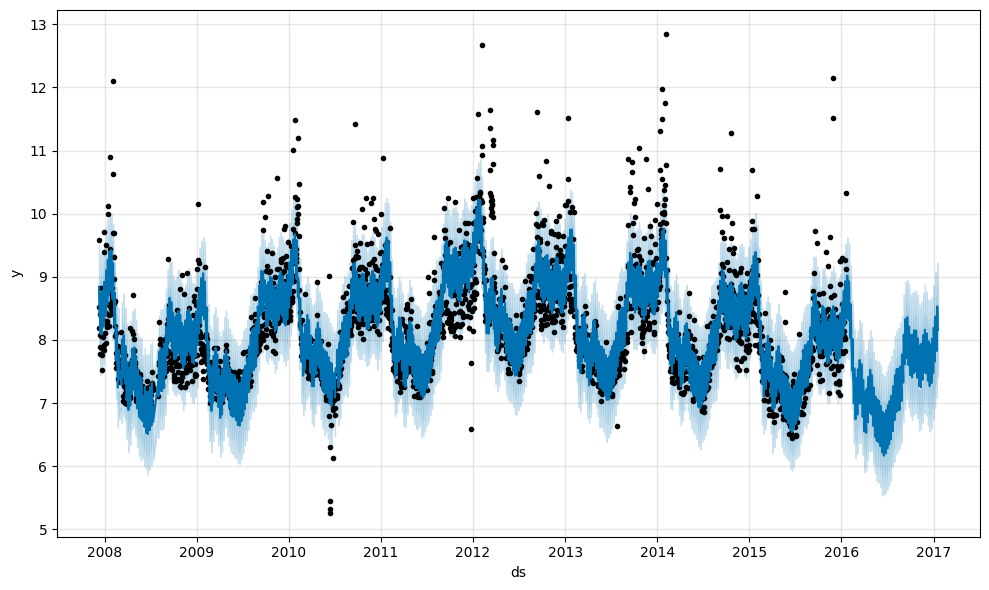

In [14]:
# plot the timeseries
fig1 = m.plot(forecast)

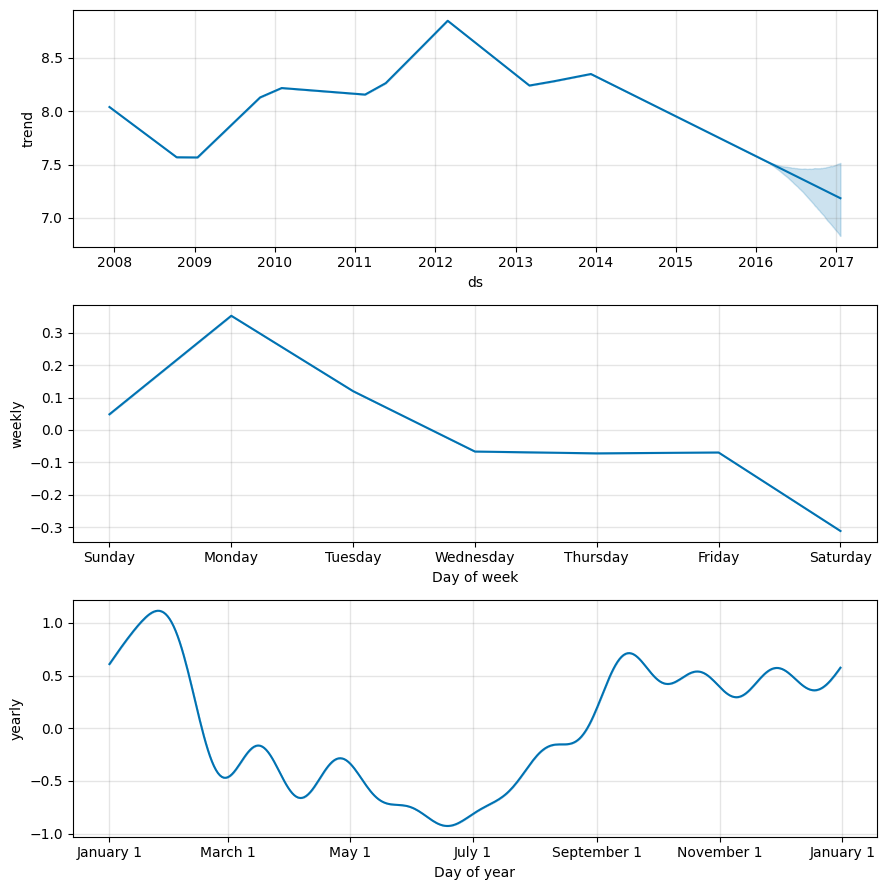

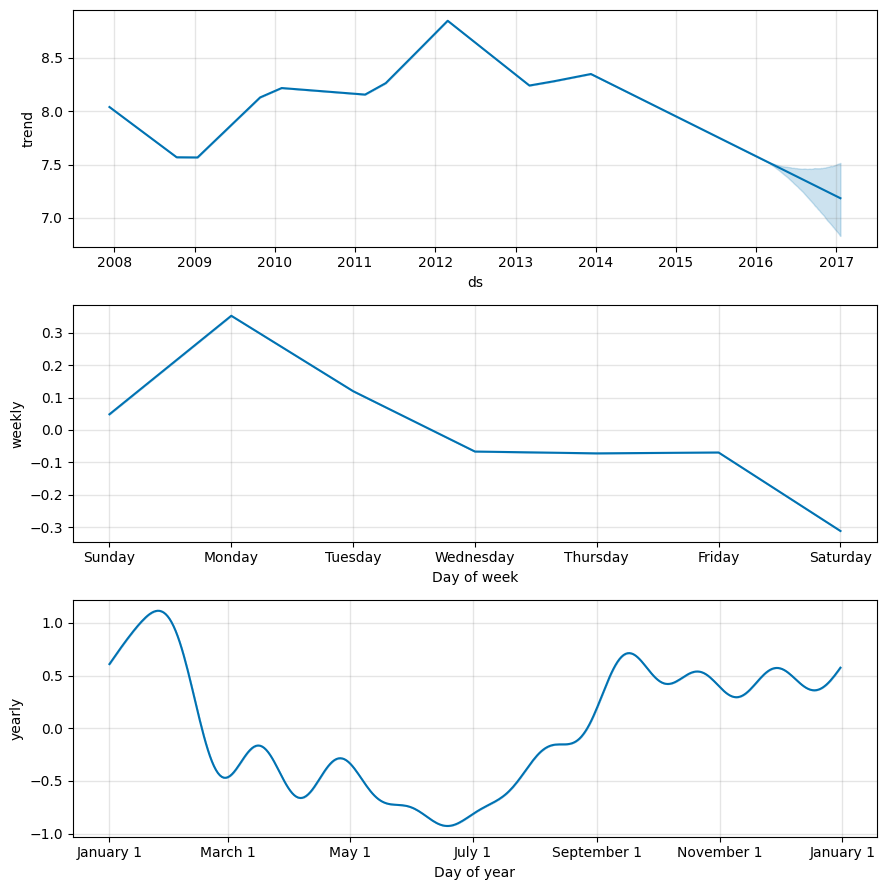

In [15]:
m.plot_components(forecast)